## INTRODUCTION




### LINKS

#### Dataset link

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

#### Presentation link

https://youtu.be/iUHOreaT0T4

#### Submit Version of Collab

https://colab.research.google.com/drive/18S-9Efv6JHsqQpM7WDzOZU8MLuPiiN3h#scrollTo=jyZcK9PmW532

#### Git Repo

https://github.com/ArslanAbakarov/diabetes_prediction

#### Deployed app

https://aabakarov.shinyapps.io/diabetes_prediction/

### PIPELINE

Business problem => Analytical Problem => Assemble Model Dataset

Data Exploration => Outliers, Missing Values, Duplicates, ???

Transformations

Dummy Encoding

Feature Selection

Train

Test


### DESCRIPTION

<B>Business Problem</B>: The Public Health Authority of Canada is looking to undertake a Public Health campaign to target high risk individuals for Diabetes.
The YorkU student team were hired to prepare a forecast model to help the Authority determine risk factors to diabetes.  With these risk factors, the Public Health would better target
their campaign to optimise spend and resources on the indivduals or groups most likely to be at risk.

Model Choice: After careful consideration, the team decided to use Binary Classification.  "Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Pass/Fail, Positive/Negative, Default/Not-Default etc. A few real world use cases for classification are listed below:

    Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease." (source: https://www.pycaret.org/tutorials/html/CLF101.html, accessed 10th October 2024).

**The model chosen** was a supervised machine learning classification model. *pycaret.classification*

## INSTALL LIBRARIES ETC

In [ ]:
# INSTALL PYCARET

# !pip install pycaret
!pip install pycaret[full]
!pip install scipy==1.9.3

## IMPORT DATASET


### **IF USING IN GOOGLE CLOUD**

In [ ]:
# LOAD DATASET and Dependencies
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as mp

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
g_drive = 'gdrive/My Drive/'

# MAKE SURE YOU HAVE ML FOLDER AND THIS FILE IN IT FOR IT TO WORK
file_path = 'ML/diabetes_prediction_dataset.csv'

df_path = os.path.join(g_drive, file_path)  #change dir to your project folder
df = pd.read_csv(df_path)

# OUTPUT DF
df

ModuleNotFoundError: No module named 'google.colab'

### **IF USING LOCAL ENVIROMENT CONNECTION**

You need to install Jupiter Notebook. I recommend using WSL on Windows.

In [ ]:
# LOAD DATASET FOR LOCAL ENVIRONMENT

import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.mosaicplot as mp

file_path = '/mnt/c/ML/diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

# OUTPUT DF
# did it load?
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
# import pycaret#
import pycaret
pycaret.__version__

'3.3.2'

## DATA EXPLORATION


Let's begin

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
## FIRST 100 entries
df.head(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
95,Male,19.0,0,0,never,27.32,6.1,80,0
96,Female,67.0,0,0,never,27.32,6.2,159,1
97,Male,11.0,0,0,No Info,27.32,6.1,90,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0


### TARGET VALUES AND BALANCE

diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64
diabetes
0    91500
1     8500
Name: count, dtype: int64


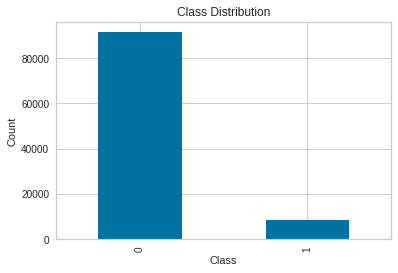

In [ ]:
# CLASS PROPORTIONS
class_proportions = df['diabetes'].value_counts(normalize=True)
print(class_proportions)

diabetes_values = pd.Series(df['diabetes']).value_counts()
print(diabetes_values)

df['diabetes'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

91,500 to 8,500, we have an imbalanced dataset
 e.g., 50% vs. 50% in binary classification), the dataset is balanced. If one class dominates (e.g., 90% vs. 10%), the dataset is imbalanced
 oversampling, undersampling, or using specialized algorithms (e.g., SMOTE, class-weighted models) to address the imbalancex.

 Accuracy is not a good performance metric when the data is imbalanced.
 we need to consider ver/under sampling approaches e.g., SMOTE, AdaSYN and ROSE to deal with imbalanced data.

 For imbalanced data, a better metric is per-class accuracy, precision, recall.

 Cohen’s kappa statistic is a performance metric that applies to both multiclass and imbalanced learning problems

 Target class imbalance directly affects the performance of machine learning models, especially in classification tasks.

 If the model sees one class much more frequently than others, it may become biased toward predicting that dominant class, leading to poor performance on the underrepresented class(es). This is why it’s important to assess whether the target is imbalanced.

 The other columns (features) do not impact whether the dataset is considered imbalanced in terms of classification because they are inputs that describe the data, not the labels you’re trying to predict.

 Redundant Features: If one feature is overwhelmingly dominant or has low variance, it might provide little value to the model.

### GENDER

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


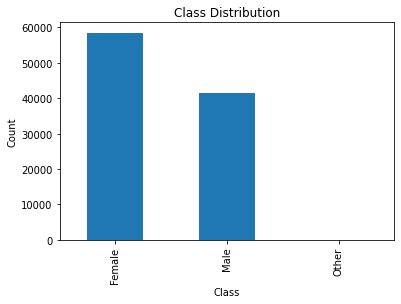

gender
Female    0.58552
Male      0.41430
Other     0.00018
Name: proportion, dtype: float64


diabetes,0,1,All
gender,,,
Female,54091,4461,58552
Male,37391,4039,41430
Other,18,0,18
All,91500,8500,100000


In [ ]:
import statsmodels.graphics.mosaicplot as mp

values = pd.Series(df['gender']).value_counts()
print(values)

df['gender'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_proportions = df['gender'].value_counts(normalize=True)
print(class_proportions)

## Gender Crosstab with Diabetes
pd.crosstab(df.gender, df.diabetes, margins=True)

# 18 of other, we can drop those values probably

58% are Female entries and 41% are male entries. And only 18 entries are Other.

#### DROP OTHER GENDER (just 18 entries out of 100000)

In [ ]:
# drop rows where gender = other
df = df[df['gender'] != 'Other']

### SMOKING

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


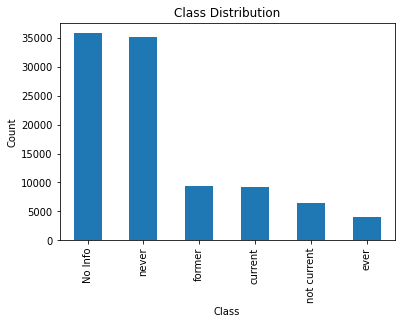

smoking_history
No Info        0.35816
never          0.35095
former         0.09352
current        0.09286
not current    0.06447
ever           0.04004
Name: proportion, dtype: float64


<Figure size 432x288 with 0 Axes>

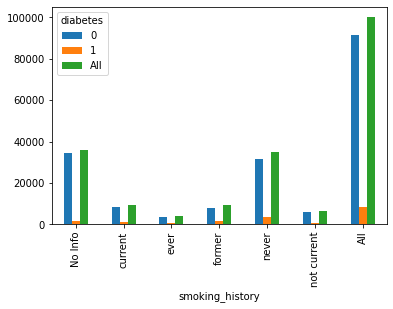

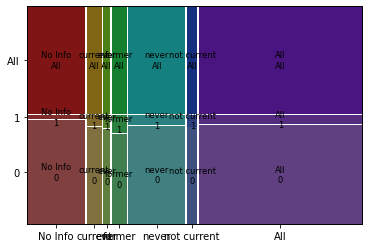

In [ ]:
values = pd.Series(df['smoking_history']).value_counts()
print(values)

df['smoking_history'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_proportions = df['smoking_history'].value_counts(normalize=True)
print(class_proportions)

## Smoking crosstab with diabetes
crosstab = pd.crosstab(df.smoking_history, df.diabetes, margins=True)

plt.figure()
crosstab.plot.bar();
mp.mosaic(crosstab.stack());

### HEART DESEASE EXPLORATION

heart_disease
0    96058
1     3942
Name: count, dtype: int64


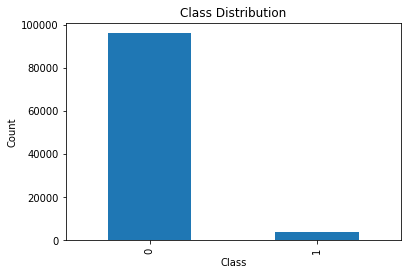

heart_disease
0    0.96058
1    0.03942
Name: proportion, dtype: float64


<Figure size 432x288 with 0 Axes>

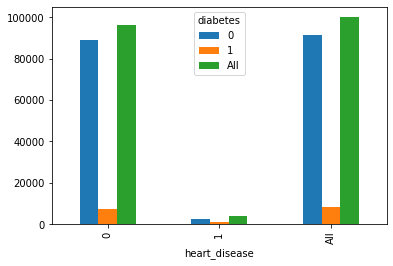

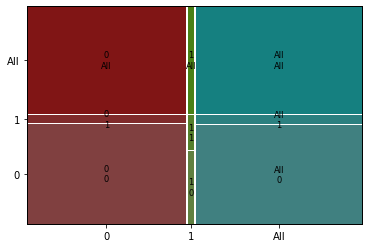

In [ ]:
values = pd.Series(df['heart_disease']).value_counts()
print(values)

df['heart_disease'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_proportions = df['heart_disease'].value_counts(normalize=True)
print(class_proportions)

## Heart crosstab with Diabetes
crosstab = pd.crosstab(df.heart_disease, df.diabetes, margins=True)

plt.figure()
crosstab.plot.bar();
mp.mosaic(crosstab.stack());



hypertension
0    92515
1     7485
Name: count, dtype: int64


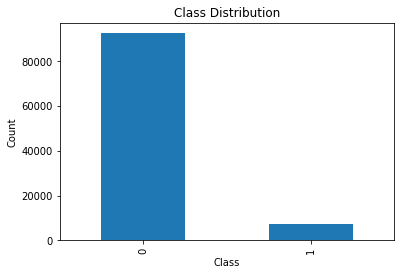

hypertension
0    0.92515
1    0.07485
Name: proportion, dtype: float64


<Figure size 432x288 with 0 Axes>

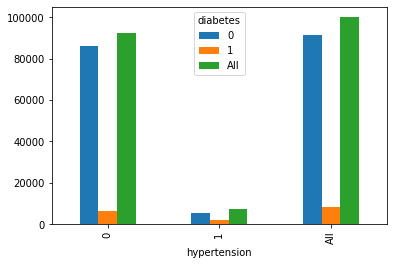

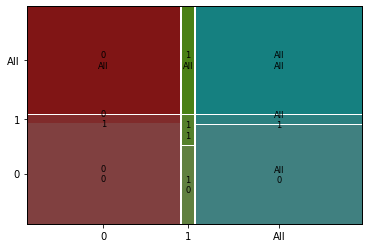

In [ ]:
values = pd.Series(df['hypertension']).value_counts()
print(values)

df['hypertension'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_proportions = df['hypertension'].value_counts(normalize=True)
print(class_proportions)

## Hypertension crosstab with Diabetes
crosstab = pd.crosstab(df.hypertension, df.diabetes, margins=True)

plt.figure()
crosstab.plot.bar();
mp.mosaic(crosstab.stack());

In [ ]:
# Return a tuple representing the dimensionality of the DataFrame.
print(df.shape) # (100000, 9) means 100000 rows and 9 columns

(100000, 9)


### NULLS AND MISSING VALUES



#### MISSING DATA

<Axes: >

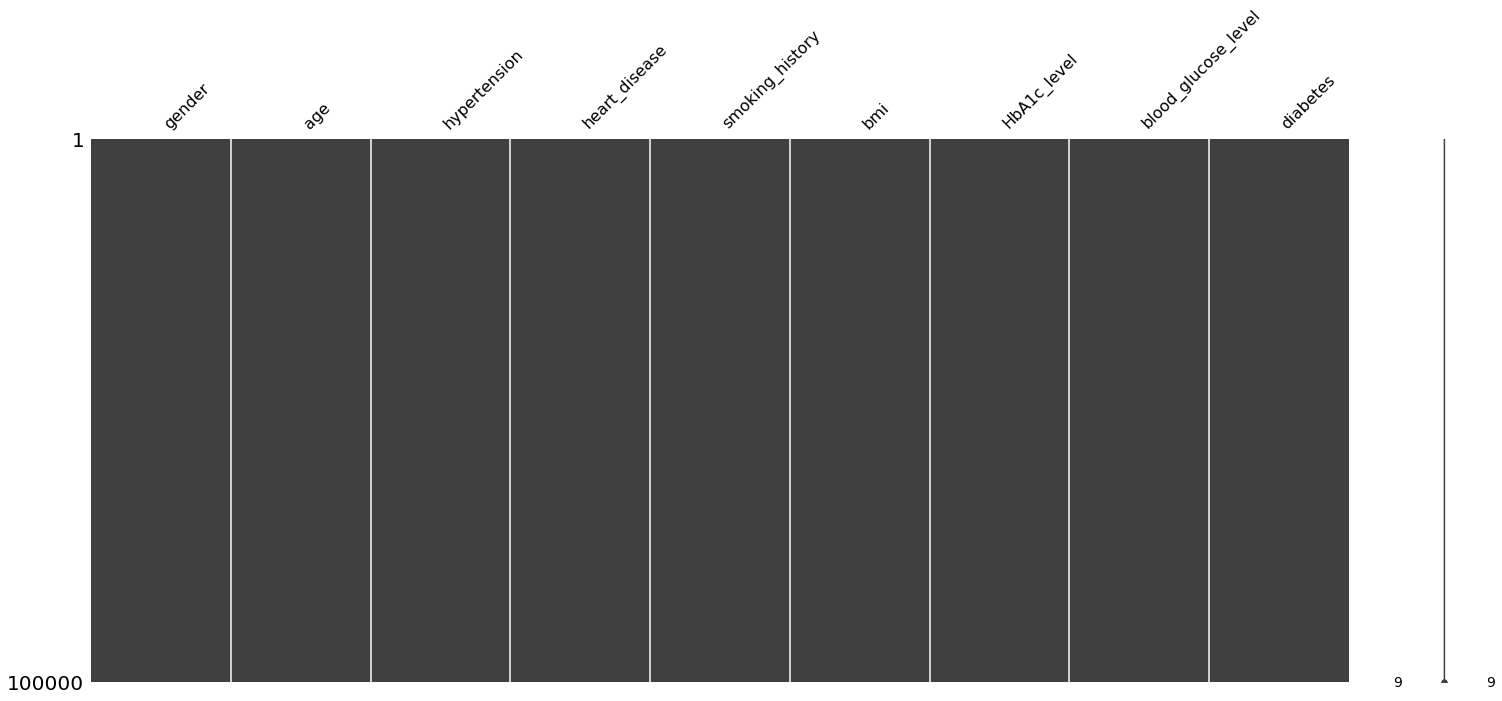

In [ ]:
# VISUALISE MISSING DATA 1
import missingno as msno
import seaborn as sns
msno.matrix(df)

# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
# we have no missing data in the dataset

In [ ]:
# CHECK FOR NULLS
df.isnull().sum()

# in this dataset we basically don't have any nulls

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### CORRELATION MATRIX

In [ ]:
# not going to work until fields like Gender etc get encoded

corr_matrix = df.corr()
plt.xlabel("X-axis Label", fontsize=20)  # Adjust the font size as needed
# Set font size for y-axis label
plt.ylabel("Y-axis Label", fontsize=20)  # Adjust the font size as needed
plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 12})  # Adjust the value as needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Display the heatmap
plt.show()

ValueError: could not convert string to float: 'Female'

### OUTLIERS

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
def outputOutliers(columnName):
  Q1 = np.percentile(df[columnName], 25)
  Q3 = np.percentile(df[columnName], 75)

  # Calculate the Interquartile Range (IQR)
  IQR = Q3 - Q1

  # Define outlier thresholds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find outliers
  outliers = df[(df[columnName] < lower_bound) | (df[columnName] > upper_bound)]

  print("Lower bound for " + columnName + ": " + str(lower_bound))
  print("Upper bound for " + columnName + ": " + str(upper_bound))

  # Display the outliers
  outliers_values = outliers[columnName].values
  print("Outliers for " + columnName + ":")
  print(outliers_values)

In [ ]:
ax = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].plot(kind='box', title='boxplot', figsize=(15,8))

Lower bound for age: -30.0
Upper bound for age: 114.0
Outliers for age:
[]


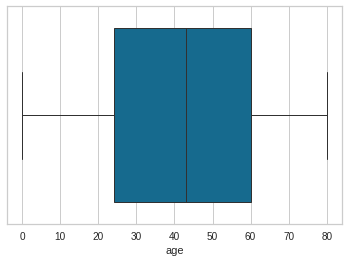

In [ ]:
# OUTLIERS
sns.boxplot(x=df['age'])
outputOutliers('age')

# no outliers for AGE

Lower bound for blood_glucose_level: 11.5
Upper bound for blood_glucose_level: 247.5
Outliers for blood_glucose_level:
[260 300 280 ... 300 300 280]


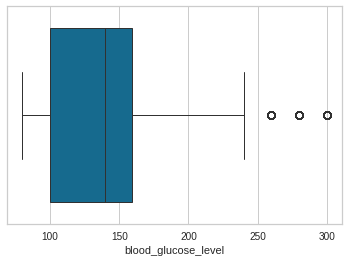

In [ ]:
# outliers: blood glucose
sns.boxplot(x=df['blood_glucose_level'])
outputOutliers('blood_glucose_level')

# we have outliers for blood glucose

Lower bound for HbA1c_level: 2.6999999999999993
Upper bound for HbA1c_level: 8.3
Outliers for HbA1c_level:
[9.  9.  8.8 ... 9.  9.  8.8]


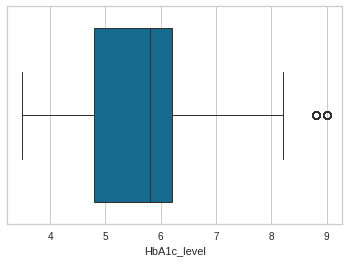

In [ ]:
# outliers hba1c level
sns.boxplot(x=df['HbA1c_level'])
outputOutliers('HbA1c_level')
# we have outliers for hba1c

Lower bound for bmi: 14.705
Upper bound for bmi: 38.504999999999995
Outliers for bmi:
[54.7  13.99 56.43 ... 60.52 45.15 40.69]


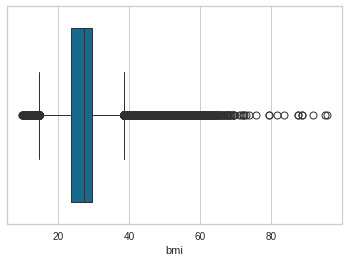

In [ ]:
# outliers bmi
sns.boxplot(x=df['bmi'])
outputOutliers('bmi')

# we have outiers for bmi, highly skewed, we will apply Log transform to those values

## PREPARING THE DATASET

### ENCODING

#### ONE-HOT ENCODING

In [ ]:
# ONE-HOT ENCODE SMOKING HISTORY
# creates columns true/false for categorical columns and removes those columns
df = pd.get_dummies(df, columns=['smoking_history'], prefix=['smoking_history'])
df = pd.get_dummies(df, columns=['gender'], prefix=['gender'])

In [ ]:
# check if new columns appeared
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current', 'gender_Female', 'gender_Male',
       'gender_Other'],
      dtype='object')

### CORRELATION MATRIX

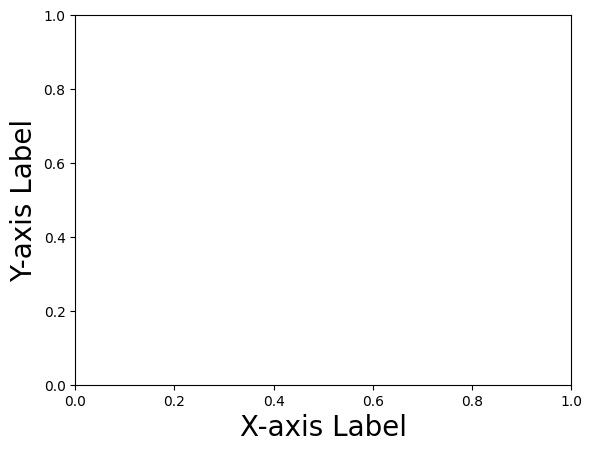

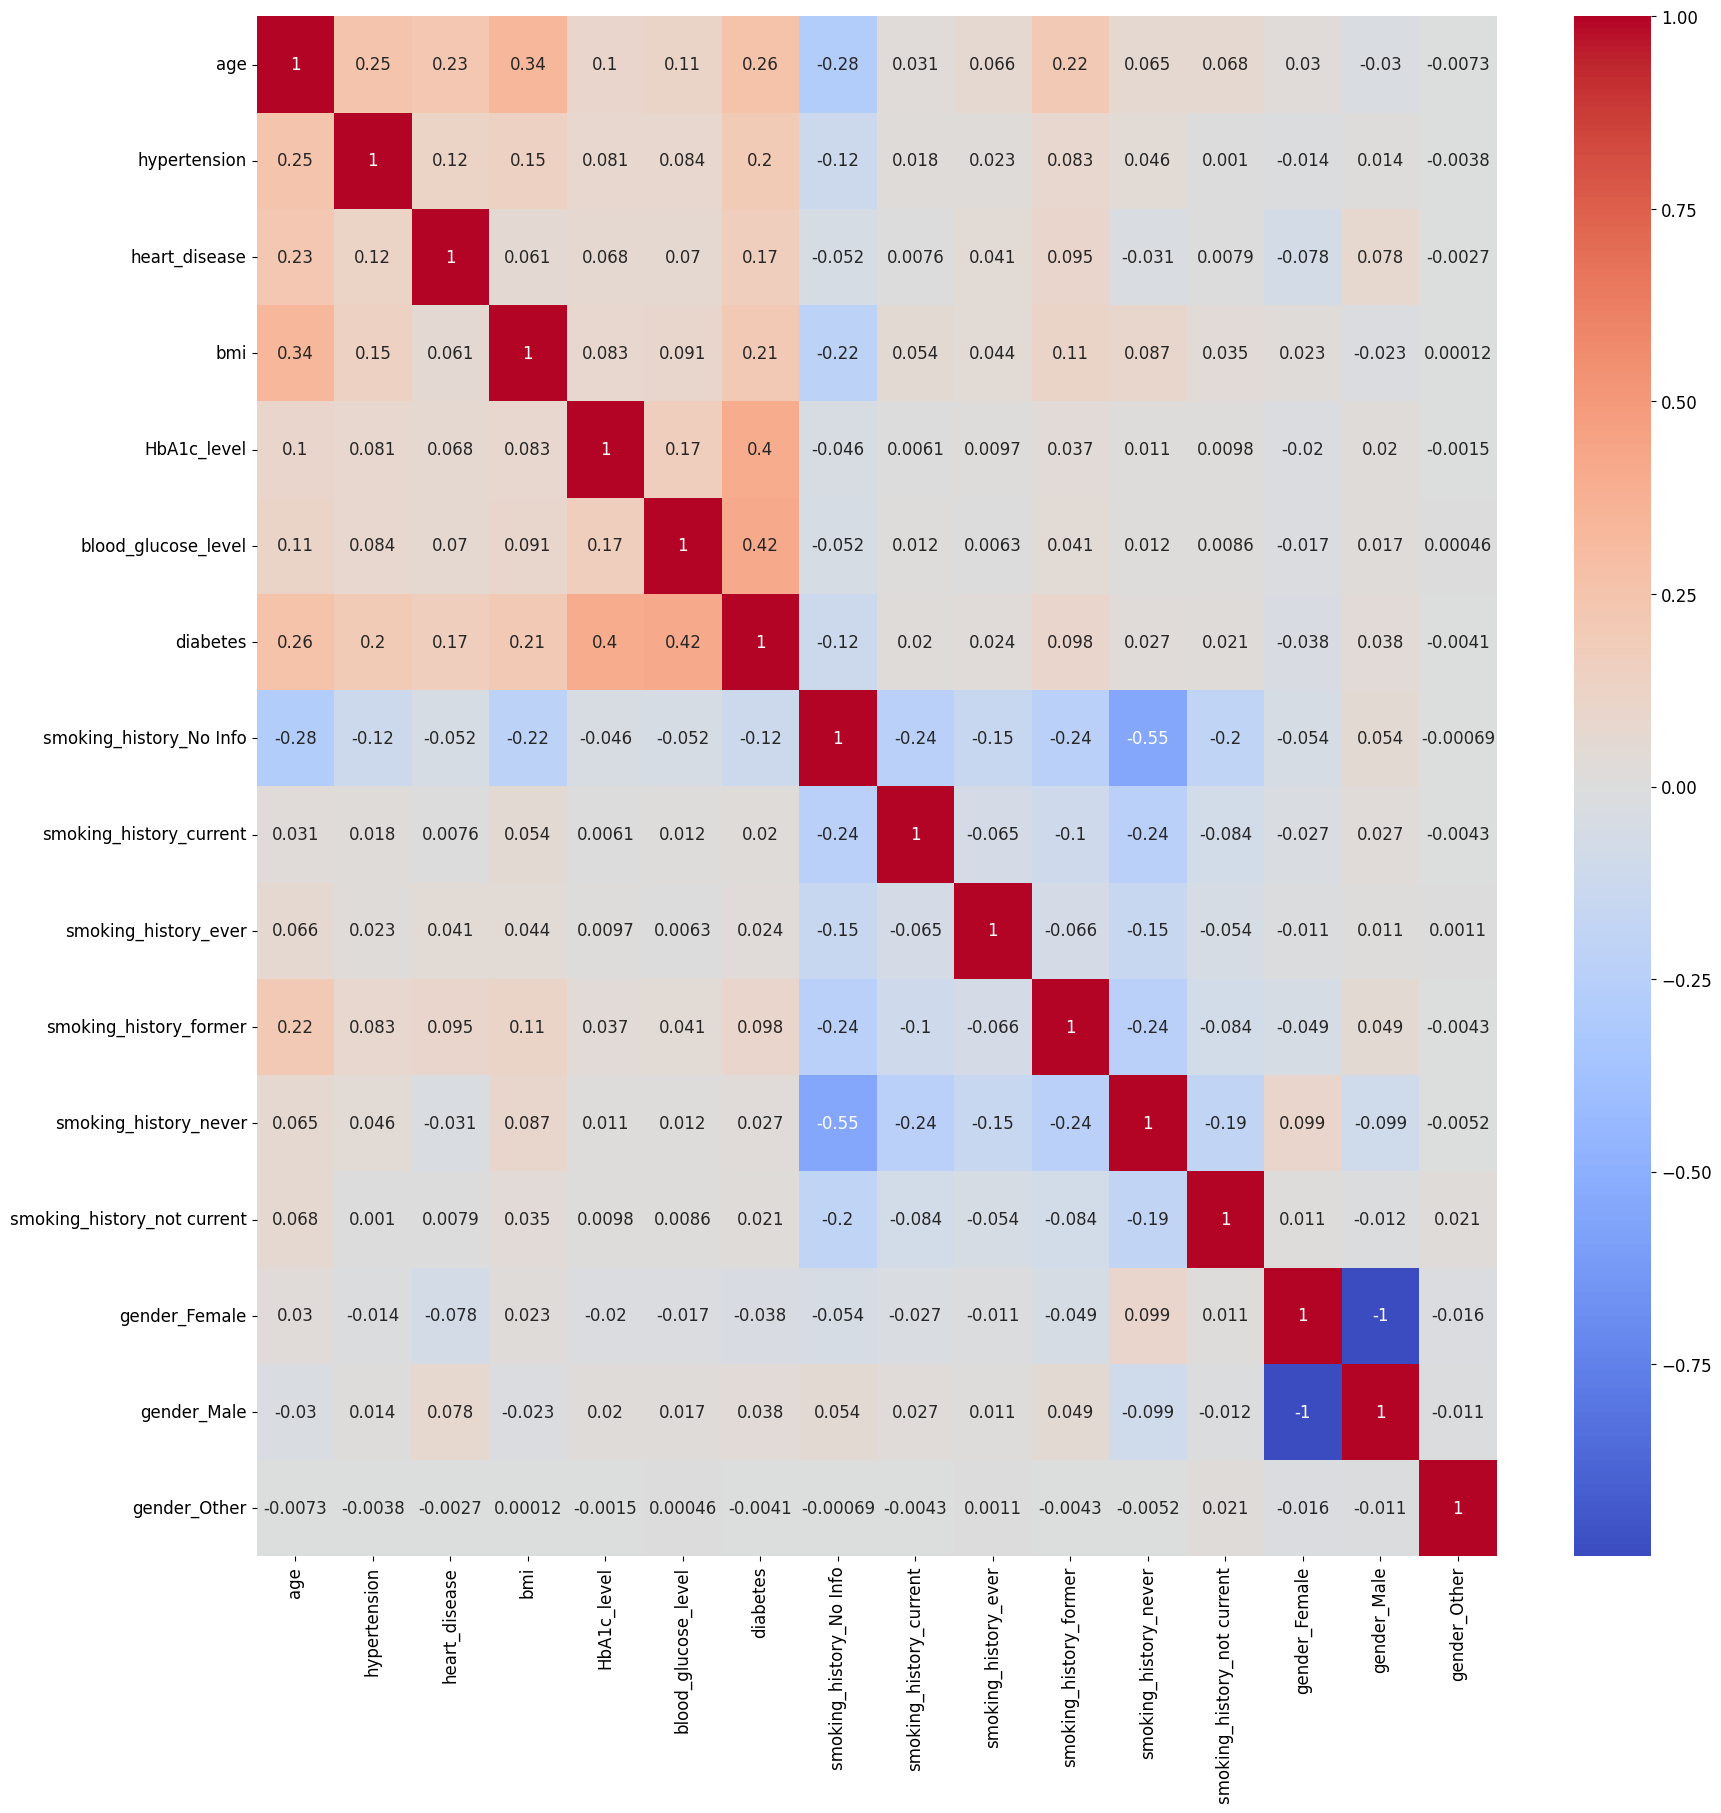

In [ ]:
# not going to work until fields like Gender etc get encoded

corr_matrix = df.corr()
plt.xlabel("X-axis Label", fontsize=20)  # Adjust the font size as needed
# Set font size for y-axis label
plt.ylabel("Y-axis Label", fontsize=20)  # Adjust the font size as needed
plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 12})  # Adjust the value as needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Display the heatmap
plt.show()

### REMOVAL OF OUTLIERS

In [ ]:
# REMOVAL OF OUTLIERS

# If outliers are due to errors or noise, consider removing them from your dataset. However, be cautious as removing too many data points can lead to information loss.
# from scipy import stats
# z = np.abs(stats.zscore(df['column_name']))
# df_no_outliers = df[(z < 3)]  # Keep data points with Z-score < 3

Some features might be irrelevant or potentially introduce bias, even if they appear statistically significant.

### LOG TRANSFORMATION AND STANDARDISING

A log transformation helps by compressing the range of large values and spreading out smaller values, making the data more evenly distributed.

In [ ]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False,True,False,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False,True,False,False
2,28.0,0,0,27.32,5.7,158,0,False,False,False,False,True,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False,True,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,True,False,False,False,False,False,True,False,False
99996,2.0,0,0,17.37,6.5,100,0,True,False,False,False,False,False,True,False,False
99997,66.0,0,0,27.83,5.7,155,0,False,False,False,True,False,False,False,True,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,False,True,False,True,False,False


In [ ]:
# TRANSORMATION OF OUTLIERS through LOG

# LOG transformation for BMI
df['bmi'] = np.log(df['bmi'])

# We don't want to apply LOG tr. to other columns because they are not skewed
# df['blood_glucose_level'] = np.log(df['blood_glucose_level'])
# df['HbA1c_level'] = np.log(df['HbA1c_level'])
# df['age'] = np.log(df['age'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['age', 'blood_glucose_level', 'HbA1c_level']])
df[['age', 'blood_glucose_level', 'HbA1c_level']] = scaler.transform(df[['age', 'blood_glucose_level', 'HbA1c_level']])

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,1.692704,0,1,never,3.226447,1.006810,0.051658,0
1,Female,0.538006,0,0,No Info,3.307619,1.006810,-1.440826,0
2,Male,-0.616691,0,0,never,3.307619,0.162958,0.499404,0
3,Female,-0.261399,0,0,current,3.154870,-0.493371,0.424780,0
4,Male,1.515058,1,1,current,3.002708,-0.680894,0.424780,0
...,...,...,...,...,...,...,...,...,...
99995,Female,1.692704,0,0,No Info,3.307619,0.631765,-1.192079,0
99996,Female,-1.771388,0,0,No Info,2.854745,0.913049,-0.943331,0
99997,Male,1.070944,0,0,former,3.326115,0.162958,0.424780,0
99998,Female,-0.794336,0,0,never,3.567277,-1.430984,-0.943331,0


### CLIP VALUES

In [ ]:
# df
upper_limit = df['HbA1c_level'].quantile(0.99)  # 95th percentile as upper limit
lower_limit = df['HbA1c_level'].quantile(0.00)
df['HbA1c_level'] = np.clip(df['HbA1c_level'], lower_limit, upper_limit)

In [ ]:
upper_limit = df['blood_glucose_level'].quantile(0.99)  # 95th percentile as upper limit
lower_limit = df['blood_glucose_level'].quantile(0.00)
df['blood_glucose_level'] = np.clip(df['blood_glucose_level'], lower_limit, upper_limit)

In [ ]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False,True,False,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False,True,False,False
2,28.0,0,0,27.32,5.7,158,0,False,False,False,False,True,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False,True,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,True,False,False,False,False,False,True,False,False
99996,2.0,0,0,17.37,6.5,100,0,True,False,False,False,False,False,True,False,False
99997,66.0,0,0,27.83,5.7,155,0,False,False,False,True,False,False,False,True,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,False,True,False,True,False,False


In [ ]:
# OUTLIERS (EXAMPLE)

# Winsorizing: Cap extreme values at a certain percentile, effectively limiting the influence of outliers without completely removing them
# from scipy.stats.mstats import winsorize
# df['bmi'] = winsorize(df['bmi'], limits=[0.05, 0.05])  # Winsorize at 5th and 95th percentiles

In [ ]:
# OUTLIERS (EXAMPLE)

# Example: Replacing outliers with median
# median = df['bmi'].median()
# df['bmi'] = np.where(df['bmi'] > upper_limit, median, df['bmi'])

### VARIANCE THRESHOLD (not using in final model)

In [ ]:
# First encode columns

# Remove features with low variance
# You should typically apply VarianceThreshold before other preprocessing techniques such as scaling.
# columns (features) with variance below the specified threshold will be removed from the resulting dataset.

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)

In [ ]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']
x_df = df[features]  # Features DataFrame
y_df = df['diabetes']  # Target variable
bmi_df = df['bmi']

In [ ]:
# APPLY THRESHOLD
x_selected = selector.fit_transform(x_df)
X_selected_df = pd.DataFrame(x_selected, columns=x_df.columns[selector.get_support(indices=True)])
selected_features_df = pd.concat([X_selected_df, y_df, bmi_df], axis=1)
selected_features_df

# after we left with age, hba1c, bgl, smoking never, diabetes

In [ ]:
df = selected_features_df

In [ ]:
# from sklearn.feature_selection import VarianceThreshold
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
# plt.show()

### REMOVE BASED ON Z-SCORE

In [ ]:
# OUTLIERS (EXAMPLE)

# Example: Removing outliers based on Z-score

# from scipy import stats
# z = np.abs(stats.zscore(df['column_name']))
# df_no_outliers = df[(z < 3)]  # Keep data points with Z-score < 3

### DUPLICATES

In [ ]:
# CHECK FOR DUPLICATES
# should generally remove duplicates from your dataset
# Duplicates can artificially inflate model performance during training
# Removing duplicates reduces the dataset size, potentially speeding up data processing and model training times
# Duplicates can introduce inconsistencies if they contain slightly different values for the same entity, leading to conflicting information.

duplicates = df.duplicated()
print(df.duplicated().sum())

# it will be 3854
# we will get more duplicates if we log transform outliers

3860


REMOVE DUPLICATES

In [ ]:
# REMOVE DUPLICATES
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


0


## TRAINING

### PREPARE TRAINING

In [ ]:
from sklearn.model_selection import train_test_split

# If it's a regression problem we import pycaret.regression
# from pycaret.regression import *

# for classification
from pycaret.classification import *

reduced_set_of_features = [ 'age', 'HbA1c_level', 'hypertension',
                            'heart_disease', 'bmi', 'blood_glucose_level',
                            'smoking_history_former',
                            'diabetes']

reduced_set_of_features_smoking = [ 'age',
                                   'HbA1c_level', 'hypertension',
                            'heart_disease', 'bmi', 'blood_glucose_level',
                            'smoking_history_current',
                            'smoking_history_ever',
                            'smoking_history_former',
                            'smoking_history_never',
                            'smoking_history_not current',
                            'diabetes']

full_set_of_features = ['age',
            'hypertension',
            'heart_disease',
            'bmi',
            'HbA1c_level',
       'blood_glucose_level',

       'smoking_history_current',
       'smoking_history_ever',
       'smoking_history_former',
       'smoking_history_never',
       'smoking_history_not current',
        'diabetes',
       'gender_Female', 'gender_Male',
       'smoking_history_No Info',
      ]

# features = reduced_set_of_features

features = full_set_of_features
selected_features_df = df[features]  # Include the target column

# for classification
# add fix_imbalance=True - to use SMOTE to fix Imbalance for Diabetes field

train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

### Logistic Regression, full set of features (baseline)

Setup sets to train with train, test and validation data set
initializes the training environment and creates the transformation pipeline.
Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. data and target.

In [ ]:
features = full_set_of_features
# features = reduced_set_of_features
selected_features_df = df[features]

clf = setup(data=selected_features_df, target='diabetes', train_size=0.8)
model = create_model('lr')
holdout_pred = predict_model(model)

,Description,Value
0,Session id,2809
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(100000, 15)"
5,Transformed train set shape,"(80000, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9584,0.9614,0.6000,0.8699,0.7102,0.6886,0.7024
1,0.9602,0.9634,0.6279,0.8679,0.7287,0.7078,0.7186
2,0.9604,0.9632,0.6279,0.8697,0.7293,0.7085,0.7195
3,0.9618,0.9617,0.6353,0.8816,0.7385,0.7184,0.7297
4,0.9595,0.9586,0.6368,0.8490,0.7277,0.7063,0.7149
5,0.9609,0.9644,0.6471,0.8577,0.7376,0.7169,0.7253
6,0.9596,0.9623,0.6382,0.8493,0.7288,0.7075,0.7159
7,0.9600,0.9601,0.6265,0.8659,0.7270,0.7060,0.7168
8,0.9626,0.9615,0.6324,0.8977,0.7420,0.7225,0.7354


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9610,0.9622,0.6406,0.8650,0.7361,0.7155,0.7249


In [ ]:
best_model = compare_models(sort = 'Recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:16:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.0872,0.9061,1.0000,0.0852,0.1570,0.0004,0.0087,0.0220
dt,Decision Tree Classifier,0.9513,0.8564,0.7415,0.7020,0.7210,0.6944,0.6948,0.0260
svm,SVM - Linear Kernel,0.9492,0.9604,0.6922,0.7272,0.7006,0.6733,0.6784,0.1520
ada,Ada Boost Classifier,0.9716,0.9789,0.6868,0.9703,0.8040,0.7892,0.8030,0.1460
rf,Random Forest Classifier,0.9700,0.9596,0.6841,0.9489,0.7949,0.7792,0.7914,0.3120
gbc,Gradient Boosting Classifier,0.9719,0.9789,0.6799,0.9842,0.8041,0.7894,0.8052,0.4270
et,Extra Trees Classifier,0.9662,0.9527,0.6768,0.9005,0.7727,0.7548,0.7639,0.2460
nb,Naive Bayes,0.9010,0.9103,0.6626,0.4449,0.5323,0.4794,0.4913,0.0200
lr,Logistic Regression,0.9601,0.9617,0.6284,0.8659,0.7281,0.7072,0.7179,0.6180
lda,Linear Discriminant Analysis,0.9557,0.9539,0.5863,0.8456,0.6923,0.6693,0.6825,0.0260


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
tuned_model = tune_model(model, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8843,0.9668,0.9012,0.4261,0.5786,0.5213,0.5706
1,0.8763,0.9605,0.8864,0.4075,0.5583,0.4976,0.5486
2,0.8826,0.9582,0.8628,0.4194,0.5644,0.5058,0.5499
3,0.8909,0.9604,0.8732,0.4401,0.5853,0.5302,0.5716
4,0.8828,0.9612,0.8820,0.4214,0.5703,0.5121,0.5591
5,0.8854,0.9613,0.8894,0.4280,0.5779,0.5208,0.5676
6,0.8836,0.9605,0.8763,0.4232,0.5707,0.5127,0.5583
7,0.8862,0.9560,0.8540,0.4273,0.5696,0.5123,0.5532
8,0.8917,0.9642,0.8761,0.4423,0.5878,0.5331,0.5745


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_model = tune_model(model, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9598,0.9671,0.6534,0.8569,0.7414,0.7201,0.7279
1,0.9589,0.9598,0.6357,0.8620,0.7317,0.7100,0.7197
2,0.9580,0.9575,0.6209,0.8645,0.7227,0.7007,0.7119
3,0.9575,0.9600,0.6003,0.8790,0.7134,0.6913,0.7060
4,0.9598,0.9611,0.6431,0.8668,0.7384,0.7171,0.7265
5,0.9599,0.9610,0.6283,0.8838,0.7345,0.7135,0.7257
6,0.9584,0.9596,0.6200,0.8716,0.7246,0.7028,0.7147
7,0.9573,0.9554,0.6106,0.8661,0.7163,0.6939,0.7064
8,0.9596,0.9637,0.6327,0.8737,0.7340,0.7127,0.7236


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_model = tune_model(model, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8843,0.9668,0.9012,0.4261,0.5786,0.5213,0.5706
1,0.8762,0.9605,0.8850,0.4071,0.5576,0.4969,0.5477
2,0.8826,0.9582,0.8628,0.4194,0.5644,0.5058,0.5499
3,0.8909,0.9604,0.8732,0.4401,0.5853,0.5302,0.5716
4,0.8828,0.9612,0.8820,0.4214,0.5703,0.5121,0.5591
5,0.8853,0.9613,0.8894,0.4277,0.5776,0.5205,0.5674
6,0.8835,0.9605,0.8763,0.4229,0.5705,0.5124,0.5581
7,0.8862,0.9560,0.8540,0.4273,0.5696,0.5123,0.5532
8,0.8918,0.9642,0.8776,0.4427,0.5885,0.5339,0.5754


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_model = tune_model(model, optimize='Recall')

### LR, reduced set of featuers

In [ ]:
# features = full_set_of_features
features = reduced_set_of_features_smoking
# features = reduced_set_of_features
selected_features_df = df[features]

clf = setup(data=selected_features_df, target='diabetes', train_size=0.8)
model = create_model('lr')
holdout_pred = predict_model(model)

,Description,Value
0,Session id,3813
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(96146, 12)"
4,Transformed data shape,"(96146, 12)"
5,Transformed train set shape,"(76916, 12)"
6,Transformed test set shape,"(19230, 12)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9594,0.9609,0.6362,0.8692,0.7347,0.7133,0.7235
1,0.9614,0.9662,0.6495,0.8820,0.7481,0.7277,0.7377
2,0.9588,0.9638,0.6009,0.8987,0.7202,0.6989,0.7154
3,0.9610,0.9651,0.6554,0.8708,0.7479,0.7272,0.7359
4,0.9590,0.9571,0.6274,0.8730,0.7301,0.7086,0.7199
5,0.9581,0.9606,0.6082,0.8806,0.7195,0.6977,0.7117
6,0.9614,0.9628,0.6726,0.8588,0.7543,0.7337,0.7402
7,0.9584,0.9588,0.6180,0.8729,0.7237,0.7019,0.7141
8,0.9551,0.9537,0.5973,0.8491,0.7013,0.6778,0.6901


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9580,0.9610,0.6256,0.8605,0.7245,0.7024,0.7128


### LR with Reduced set of features with Class Weight Balanced

In [ ]:
# features = full_set_of_features
features = reduced_set_of_features_smoking
# features = reduced_set_of_features
selected_features_df = df[features]

clf = setup(data=selected_features_df, target='diabetes', train_size=0.8)
model = create_model('lr', class_weight='balanced')

holdout_pred = predict_model(model)

,Description,Value
0,Session id,5155
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 12)"
4,Transformed data shape,"(100000, 12)"
5,Transformed train set shape,"(80000, 12)"
6,Transformed test set shape,"(20000, 12)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8856,0.9632,0.8838,0.4182,0.5678,0.5114,0.5591
1,0.8929,0.9646,0.8838,0.4358,0.5838,0.5303,0.5741
2,0.8859,0.9577,0.8676,0.4176,0.5638,0.5072,0.5523
3,0.8901,0.9671,0.9059,0.4305,0.5836,0.5294,0.5782
4,0.8908,0.9658,0.8985,0.4315,0.5830,0.5289,0.5762
5,0.8871,0.9662,0.9000,0.4229,0.5755,0.5199,0.5694
6,0.8868,0.9590,0.8750,0.4202,0.5677,0.5117,0.5574
7,0.8844,0.9566,0.8647,0.4138,0.5597,0.5025,0.5479
8,0.8838,0.9583,0.8544,0.4115,0.5554,0.4978,0.5420


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8848,0.9603,0.8741,0.4157,0.5634,0.5066,0.5532


### LR with SMOTE

In [ ]:
# SMOTE
# Regularization is applied by default in PyCaret's Logistic Regression.
# does training, lr stands for logistic regression
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8, fix_imbalance=True)
model = create_model('lr')
# holdout_pred = predict_model(model)

,Description,Value
0,Session id,3570
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(166400, 15)"
5,Transformed train set shape,"(146400, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9438,0.9675,0.7868,0.6369,0.7039,0.6733,0.6778
1,0.9424,0.9632,0.7559,0.6354,0.6904,0.6589,0.6619
2,0.9445,0.9565,0.7456,0.6517,0.6955,0.6651,0.6669
3,0.9431,0.9588,0.7324,0.6459,0.6864,0.6553,0.6568
4,0.9424,0.9593,0.7559,0.6354,0.6904,0.6589,0.6619
5,0.9440,0.9582,0.7368,0.6506,0.6910,0.6604,0.6619
6,0.9416,0.9585,0.7485,0.6323,0.6855,0.6536,0.6564
7,0.9428,0.9607,0.7294,0.6442,0.6841,0.6528,0.6543
8,0.9442,0.9649,0.7721,0.6434,0.7019,0.6714,0.6748


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9424,0.9612,0.7406,0.6394,0.6863,0.6548,0.6569


#### Tuning

In [ ]:
tuned_model = tune_model(model, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9434,0.9677,0.7897,0.6340,0.7033,0.6725,0.6774
1,0.9426,0.9631,0.7559,0.6369,0.6913,0.6600,0.6629
2,0.9442,0.9564,0.7426,0.6508,0.6937,0.6632,0.6649
3,0.9430,0.9589,0.7324,0.6451,0.6860,0.6547,0.6563
4,0.9428,0.9594,0.7603,0.6367,0.6930,0.6617,0.6649
5,0.9435,0.9582,0.7368,0.6473,0.6891,0.6582,0.6599
6,0.9420,0.9586,0.7500,0.6343,0.6873,0.6556,0.6584
7,0.9421,0.9606,0.7324,0.6393,0.6827,0.6510,0.6528
8,0.9441,0.9648,0.7691,0.6433,0.7006,0.6701,0.6733


Fitting 10 folds for each of 10 candidates, totalling 100 fits


#### SVM

In [ ]:
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8, fix_imbalance=True)
model = create_model('svm')
holdout_pred = predict_model(model)

,Description,Value
0,Session id,6879
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(166400, 15)"
5,Transformed train set shape,"(146400, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9185,0.9623,0.8250,0.5128,0.6325,0.5894,0.6105
1,0.9038,0.9603,0.8544,0.4641,0.6014,0.5521,0.5855
2,0.9036,0.9532,0.8132,0.4620,0.5892,0.5393,0.5670
3,0.8840,0.9621,0.8794,0.4141,0.5631,0.5060,0.5539
4,0.8814,0.9603,0.8882,0.4089,0.5600,0.5021,0.5527
5,0.9384,0.9600,0.7706,0.6086,0.6801,0.6465,0.6520
6,0.9299,0.9586,0.7794,0.5632,0.6539,0.6160,0.6261
7,0.9054,0.9576,0.8250,0.4679,0.5971,0.5481,0.5765
8,0.9040,0.9596,0.8382,0.4642,0.5975,0.5480,0.5790


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8747,0.8774,0.8806,0.3939,0.5444,0.4837,0.5365


#### Random forest

In [ ]:
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8, fix_imbalance=True)
model = create_model('rf')
holdout_pred = predict_model(model)

,Description,Value
0,Session id,8004
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(166400, 15)"
5,Transformed train set shape,"(146400, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9662,0.9605,0.7088,0.8700,0.7812,0.7631,0.7678
1,0.9701,0.9660,0.7294,0.9002,0.8058,0.7899,0.7950
2,0.9682,0.9659,0.7103,0.8944,0.7918,0.7749,0.7809
3,0.9689,0.9622,0.7029,0.9105,0.7934,0.7768,0.7844
4,0.9671,0.9558,0.6926,0.8971,0.7817,0.7643,0.7718
5,0.9679,0.9660,0.7147,0.8852,0.7909,0.7737,0.7789
6,0.9658,0.9519,0.6868,0.8845,0.7732,0.7550,0.7620
7,0.9671,0.9581,0.7015,0.8883,0.7839,0.7664,0.7726
8,0.9668,0.9634,0.7074,0.8777,0.7834,0.7656,0.7708


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9656,0.9612,0.6829,0.8863,0.7714,0.7532,0.7606


#### Best

In [ ]:
best_model = compare_models(sort = 'Recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:18:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9135,0.9589,0.8172,0.5006,0.6185,0.5733,0.5966,0.3380
nb,Naive Bayes,0.8490,0.9071,0.7856,0.3346,0.4693,0.3975,0.4469,0.0420
lr,Logistic Regression,0.9413,0.9602,0.7488,0.6307,0.6846,0.6525,0.6555,1.2230
ada,Ada Boost Classifier,0.9590,0.9719,0.7432,0.7681,0.7550,0.7327,0.7330,0.4690
gbc,Gradient Boosting Classifier,0.9644,0.9740,0.7382,0.8248,0.7791,0.7598,0.7612,1.4680
knn,K Neighbors Classifier,0.9141,0.8928,0.7379,0.4965,0.5935,0.5475,0.5610,0.1880
dt,Decision Tree Classifier,0.9492,0.8527,0.7359,0.6880,0.7111,0.6832,0.6838,0.0550
rf,Random Forest Classifier,0.9667,0.9617,0.6978,0.8872,0.7810,0.7632,0.7698,0.7250
et,Extra Trees Classifier,0.9646,0.9545,0.6916,0.8659,0.7688,0.7500,0.7556,0.6490
lda,Linear Discriminant Analysis,0.9530,0.9581,0.6668,0.7526,0.7070,0.6816,0.6831,0.1160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

KeyboardInterrupt: 

### TRAIN with CLASS WEIGHT BALANCED

Final choice of model training and comparing it to SVM and RF

In [ ]:
# TRAIN

# Regularization is applied by default in PyCaret's Logistic Regression.
# does training, lr stands for logistic regression
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8)
model = create_model('lr', class_weight='balanced')
# use class_weight balanced to balance the dataset since Diabetes in inbalanced in the dataset
holdout_pred = predict_model(model)

lr_results = pull()  # Get the results of the last trained model
lr_auc = lr_results['AUC'].values[0]
lr_recall = lr_results['Recall'].values[0]

,Description,Value
0,Session id,5278
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(100000, 15)"
5,Transformed train set shape,"(80000, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8934,0.9619,0.8750,0.4365,0.5825,0.5291,0.5712
1,0.8908,0.9594,0.8662,0.4293,0.5741,0.5195,0.5617
2,0.8814,0.9643,0.9015,0.4100,0.5637,0.5059,0.5587
3,0.8874,0.9670,0.8838,0.4223,0.5716,0.5159,0.5627
4,0.8889,0.9619,0.8897,0.4264,0.5765,0.5215,0.5684
5,0.8814,0.9569,0.8588,0.4064,0.5517,0.4932,0.5393
6,0.8901,0.9641,0.8838,0.4290,0.5776,0.5230,0.5683
7,0.8849,0.9640,0.8838,0.4165,0.5662,0.5095,0.5576
8,0.8909,0.9632,0.8897,0.4312,0.5809,0.5267,0.5725


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8892,0.9612,0.8829,0.4268,0.5754,0.5205,0.5661


In [ ]:
# lr_results['AUC'].values[0]
lr_results['Recall'].values[0]


0.8724

#### Tuned class weight balanced

In [ ]:
tuned_model = tune_model(model, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8935,0.9619,0.8765,0.4370,0.5832,0.5298,0.5722
1,0.8908,0.9593,0.8676,0.4294,0.5745,0.5199,0.5624
2,0.8825,0.9643,0.9000,0.4124,0.5656,0.5083,0.5603
3,0.8876,0.9670,0.8824,0.4228,0.5717,0.5161,0.5625
4,0.8890,0.9619,0.8897,0.4267,0.5767,0.5218,0.5686
5,0.8810,0.9570,0.8603,0.4057,0.5514,0.4928,0.5392
6,0.8896,0.9641,0.8824,0.4277,0.5761,0.5213,0.5666
7,0.8850,0.9639,0.8809,0.4166,0.5656,0.5090,0.5565
8,0.8916,0.9632,0.8926,0.4333,0.5834,0.5295,0.5754


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### SVM

In [ ]:
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8, fix_imbalance=True)
svm_model = create_model('svm', class_weight='balanced')
# holdout_pred = predict_model(model)

svm_results = pull()  # Get the results of the last trained model
svm_auc = svm_results['AUC'].values[0]
svm_recall = svm_results['Recall'].values[0]

print(svm_recall)

,Description,Value
0,Session id,8594
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(166400, 15)"
5,Transformed train set shape,"(146400, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9065,0.9597,0.8382,0.4719,0.6038,0.5555,0.5850
1,0.9274,0.9639,0.8294,0.5481,0.6600,0.6213,0.6380
2,0.9016,0.9521,0.8000,0.4552,0.5803,0.5293,0.5563
3,0.9160,0.9576,0.8176,0.5036,0.6233,0.5790,0.6006
4,0.9349,0.9598,0.7838,0.5877,0.6717,0.6364,0.6445
5,0.9229,0.9575,0.7868,0.5313,0.6343,0.5930,0.6073
6,0.8932,0.9601,0.8324,0.4334,0.5700,0.5159,0.5518
7,0.8952,0.9588,0.8515,0.4400,0.5802,0.5272,0.5648
8,0.8914,0.9584,0.8559,0.4302,0.5726,0.5180,0.5584


0.8382


#### Random forest

In [ ]:
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8, fix_imbalance=True)
rf_model = create_model('rf', class_weight="balanced")

rf_results = pull()  # Get the results of the last trained model
rf_auc = rf_results['AUC'].values[0]
rf_recall = rf_results['Recall'].values[0]

,Description,Value
0,Session id,1070
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(166400, 15)"
5,Transformed train set shape,"(146400, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9665,0.9616,0.6912,0.8902,0.7781,0.7603,0.7675
1,0.9670,0.9538,0.6985,0.8895,0.7825,0.7650,0.7715
2,0.9701,0.9629,0.7265,0.9031,0.8052,0.7892,0.7947
3,0.9635,0.9610,0.6735,0.8674,0.7583,0.7389,0.7458
4,0.9686,0.9656,0.7015,0.9086,0.7917,0.7750,0.7826
5,0.9661,0.9590,0.7044,0.8725,0.7795,0.7614,0.7665
6,0.9668,0.9631,0.7029,0.8819,0.7823,0.7646,0.7703
7,0.9649,0.9629,0.6779,0.8815,0.7664,0.7478,0.7553
8,0.9716,0.9654,0.7309,0.9187,0.8141,0.7989,0.8051


#### Compare_models

In [ ]:
compare_models([model, svm_model, rf_model], sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8875,0.9624,0.8807,0.4225,0.5710,0.5153,0.5616,0.7230
1,SVM - Linear Kernel,0.8593,0.9600,0.8766,0.4177,0.5451,0.4833,0.5389,0.1940
2,Random Forest Classifier,0.9697,0.9629,0.6891,0.9376,0.7942,0.7783,0.7891,0.2960


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5278, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Plots (Recall compare)

[0.8829, 0.6912, 0.8382]


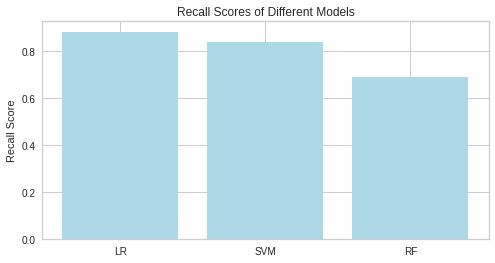

In [ ]:
print([lr_recall, rf_recall, svm_recall])

plt.figure(figsize=(8, 4))
plt.bar(["LR", "SVM", "RF"], [lr_recall, svm_recall, rf_recall], color='lightblue')
plt.ylabel('Recall Score')
plt.title('Recall Scores of Different Models')
plt.show()

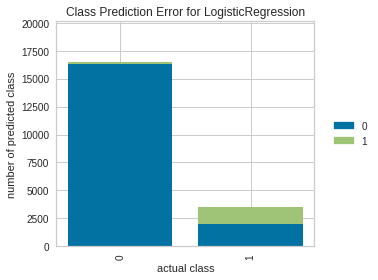

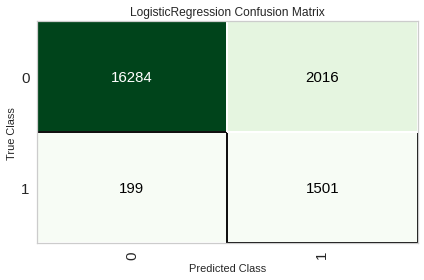

In [ ]:
# takes a minute to generate even on 4090
plot_model(tuned_model, plot = 'error')
plot_model(tuned_model, plot = 'confusion_matrix')
# plot_model(model, plot = 'learning')

### TRAIN WITH CLASS WEIGHT BALANCED and WITH SMOTE

#### Train

In [ ]:
# Regularization is applied by default in PyCaret's Logistic Regression.
# does training, lr stands for logistic regression
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8, fix_imbalance=True) # SMOTE
model = create_model('lr', class_weight='balanced') # use class_weight balanced to balance the dataset since Diabetes in inbalanced in the dataset
# holdout_pred = predict_model(model)

,Description,Value
0,Session id,2942
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(166400, 15)"
5,Transformed train set shape,"(146400, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9411,0.9588,0.7324,0.6328,0.6789,0.6467,0.6488
1,0.9422,0.9618,0.7412,0.6380,0.6857,0.6541,0.6563
2,0.9438,0.9590,0.7324,0.6501,0.6888,0.6580,0.6594
3,0.9466,0.9628,0.7912,0.6537,0.7159,0.6867,0.6906
4,0.9406,0.9552,0.7471,0.6264,0.6814,0.6490,0.6520
5,0.9360,0.9581,0.7309,0.6017,0.6600,0.6251,0.6287
6,0.9438,0.9597,0.7662,0.6416,0.6984,0.6676,0.6708
7,0.9429,0.9646,0.7750,0.6342,0.6976,0.6664,0.6704
8,0.9440,0.9623,0.7735,0.6415,0.7013,0.6707,0.6743


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9385,0.9605,0.7553,0.6120,0.6761,0.6426,0.6469


#### Tune

In [ ]:
tuned_model = tune_model(model, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9404,0.9590,0.7338,0.6277,0.6766,0.6440,0.6464
1,0.9428,0.9616,0.7426,0.6409,0.6880,0.6567,0.6588
2,0.9432,0.9591,0.7338,0.6464,0.6873,0.6563,0.6579
3,0.9454,0.9629,0.7897,0.6462,0.7108,0.6810,0.6851
4,0.9398,0.9551,0.7515,0.6201,0.6795,0.6466,0.6502
5,0.9365,0.9580,0.7338,0.6041,0.6627,0.6280,0.6316
6,0.9431,0.9597,0.7647,0.6380,0.6957,0.6646,0.6679
7,0.9431,0.9647,0.7750,0.6357,0.6985,0.6674,0.6714
8,0.9434,0.9626,0.7706,0.6382,0.6982,0.6673,0.6709


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
final_model = finalize_model(tuned_model)

#### SVM

In [ ]:
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8, fix_imbalance=True) # SMOTE
model = create_model('svm', class_weight='balanced') # use class_weight balanced to balance the dataset since Diabetes in inbalanced in the dataset

,Description,Value
0,Session id,6905
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(166400, 15)"
5,Transformed train set shape,"(146400, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9034,0.9575,0.8382,0.4623,0.5959,0.5462,0.5775
1,0.9212,0.9612,0.8309,0.5231,0.6420,0.6004,0.6207
2,0.9230,0.9603,0.7985,0.5313,0.6381,0.5969,0.6125
3,0.9372,0.9617,0.7794,0.6009,0.6786,0.6445,0.6512
4,0.9314,0.9574,0.7809,0.5704,0.6592,0.6221,0.6316
5,0.8765,0.9566,0.8647,0.3962,0.5434,0.4832,0.5326
6,0.9308,0.9581,0.7838,0.5670,0.6580,0.6206,0.6307
7,0.8884,0.9587,0.8338,0.4209,0.5594,0.5033,0.5420
8,0.9118,0.9544,0.7971,0.4883,0.6056,0.5591,0.5804


#### Random forest

In [ ]:
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8, fix_imbalance=True) # SMOTE
model = create_model('rf', class_weight='balanced') # use class_weight balanced to balance the dataset since Diabetes in inbalanced in the dataset

,Description,Value
0,Session id,765
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 15)"
4,Transformed data shape,"(166400, 15)"
5,Transformed train set shape,"(146400, 15)"
6,Transformed test set shape,"(20000, 15)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9671,0.9638,0.6912,0.8987,0.7814,0.7639,0.7716
1,0.9650,0.9611,0.6882,0.8731,0.7697,0.7511,0.7573
2,0.9686,0.9647,0.7074,0.9024,0.7931,0.7764,0.7831
3,0.9642,0.9633,0.6765,0.8745,0.7629,0.7439,0.7510
4,0.9695,0.9616,0.7118,0.9098,0.7987,0.7824,0.7893
5,0.9692,0.9645,0.7441,0.8754,0.8045,0.7879,0.7909
6,0.9705,0.9627,0.7250,0.9096,0.8069,0.7911,0.7971
7,0.9648,0.9542,0.6765,0.8812,0.7654,0.7467,0.7543
8,0.9648,0.9591,0.6956,0.8631,0.7704,0.7515,0.7566


In [ ]:
best_model = compare_models(sort = 'Recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:56:25
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9039,0.9595,0.8384,0.4700,0.6000,0.5509,0.5820,0.2830
nb,Naive Bayes,0.8502,0.9073,0.7854,0.3368,0.4714,0.4000,0.4489,0.0940
lr,Logistic Regression,0.9427,0.9605,0.7538,0.6383,0.6911,0.6598,0.6627,1.1220
knn,K Neighbors Classifier,0.9157,0.8952,0.7463,0.5031,0.6009,0.5558,0.5694,0.2070
dt,Decision Tree Classifier,0.9495,0.8575,0.7462,0.6871,0.7154,0.6878,0.6885,0.0560
gbc,Gradient Boosting Classifier,0.9646,0.9738,0.7376,0.8274,0.7798,0.7606,0.7622,1.5290
ada,Ada Boost Classifier,0.9623,0.9718,0.7356,0.8042,0.7682,0.7477,0.7487,0.4750
rf,Random Forest Classifier,0.9671,0.9616,0.7013,0.8879,0.7836,0.7660,0.7723,0.7510
et,Extra Trees Classifier,0.9650,0.9545,0.6949,0.8676,0.7717,0.7530,0.7584,0.6880
ridge,Ridge Classifier,0.9535,0.9584,0.6697,0.7559,0.7100,0.6849,0.6864,0.0360


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

KeyboardInterrupt: 

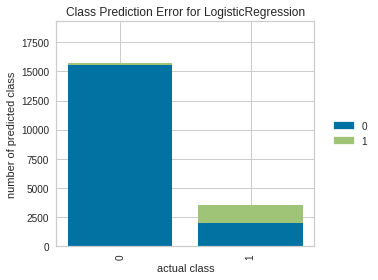

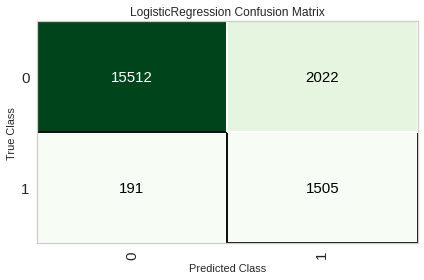

In [ ]:
plot_model(model, plot = 'error')
plot_model(model, plot = 'confusion_matrix')
# plot_model(model, plot = 'learning')
# plot_model(model, plot = 'residuals')

### PCA with PyCaret (we don't need to do PCA, we don't have high dimensional dataset)

In [ ]:
selected_features_df = df[full_set_of_features]
clf = setup(data=selected_features_df, target='diabetes', train_size=0.8, pca=True, pca_components=0.95)
model = create_model('lr')
# holdout_pred = predict_model(model)

,Description,Value
0,Session id,4716
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(96146, 15)"
4,Transformed data shape,"(96146, 9)"
5,Transformed train set shape,"(76916, 9)"
6,Transformed test set shape,"(19230, 9)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9567,0.9534,0.5906,0.8794,0.7066,0.6842,0.7000
1,0.9584,0.9582,0.6068,0.8860,0.7203,0.6987,0.7133
2,0.9622,0.9598,0.6436,0.8992,0.7502,0.7304,0.7423
3,0.9551,0.9552,0.5935,0.8538,0.7003,0.6769,0.6900
4,0.9585,0.9531,0.6200,0.8734,0.7252,0.7035,0.7156
5,0.9581,0.9588,0.6186,0.8696,0.7229,0.7009,0.7129
6,0.9561,0.9503,0.5796,0.8812,0.6993,0.6767,0.6940
7,0.9568,0.9578,0.6136,0.8560,0.7148,0.6921,0.7034
8,0.9557,0.9480,0.5811,0.8736,0.6980,0.6751,0.6914


With PCA accuracy drops to 93%

### PCA with SkLearn method exploration (we don't need to do PCA, we don't have high dimensional dataset)

In [ ]:
from sklearn.decomposition import PCA

# Select features for prediction (assuming they are in a DataFrame 'X')
X = df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current'
  # , 'smoking_history_No Info'
  , 'gender_Female', 'gender_Male', 'gender_Other'
]]

y = df['diabetes']

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train a logistic regression model on the PCA-transformed data
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_pca, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

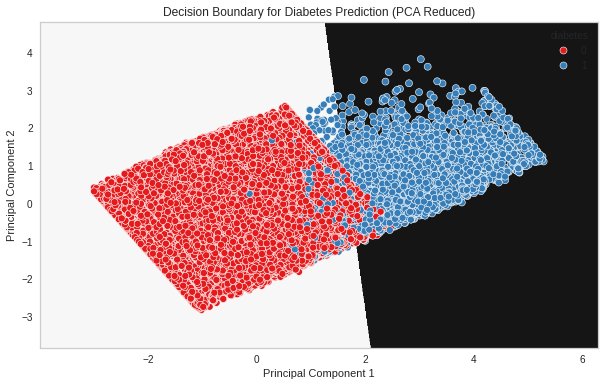

In [ ]:
# Plot decision boundary
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a mesh grid for the plot
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using a contour plot
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=1)

# Plot the actual data points
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')

plt.title("Decision Boundary for Diabetes Prediction (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## TUNE MODEL

In [ ]:
# maximizing precision
# tuned_model = tune_model(model)
# tuned_model = tune_model(model, optimize='Precision')

tuned_model = tune_model(model, optimize='F2')

holdout_pred = predict_model(tuned_model)
print("Final model")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9606,0.9624,0.6436,0.8775,0.7426,0.7218,0.7320
1,0.9577,0.9587,0.6274,0.8554,0.7239,0.7016,0.7115
2,0.9575,0.9560,0.6156,0.8636,0.7188,0.6965,0.7082
3,0.9588,0.9599,0.6318,0.8649,0.7302,0.7085,0.7187
4,0.9581,0.9617,0.6112,0.8774,0.7205,0.6986,0.7120
5,0.9590,0.9594,0.6333,0.8669,0.7319,0.7103,0.7206
6,0.9593,0.9628,0.6313,0.8717,0.7322,0.7108,0.7217
7,0.9620,0.9663,0.6681,0.8712,0.7563,0.7361,0.7437
8,0.9564,0.9601,0.6062,0.8580,0.7105,0.6877,0.6998


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9600,0.9641,0.6403,0.8716,0.7383,0.7171,0.7271


Final model


### FINALIZE

After tuning, you want to leverage all the data you have to create the most robust and well-generalized model possible.
Finalize_model does this by retraining on the full dataset.

In [ ]:
# FINALIZE
final_model = finalize_model(tuned_model)  # Or 'model' if not tuned
holdout_pred = predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8850,0.9614,0.8774,0.4262,0.5737,0.5163,0.5614


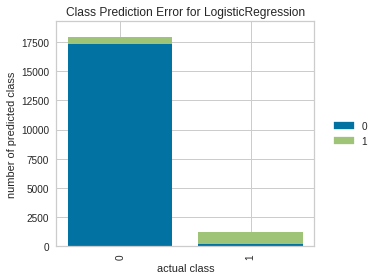

In [ ]:
plot_model(final_model, plot = 'error')

## COMPARE MODELS

In [ ]:
# BEST MODEL TRAINING
# this will train a bunch of models and evaluate them, takes a while to complete
best_model = compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:45:07
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9719,0.9791,0.6859,0.9757,0.8054,0.7908,0.8051,0.1350
gbc,Gradient Boosting Classifier,0.9718,0.9789,0.6799,0.9840,0.8040,0.7894,0.8052,0.3940
rf,Random Forest Classifier,0.9696,0.9604,0.6834,0.9433,0.7924,0.7765,0.7883,0.2630
et,Extra Trees Classifier,0.9662,0.9515,0.6766,0.9011,0.7727,0.7549,0.7640,0.2240
lr,Logistic Regression,0.9605,0.9615,0.6294,0.8696,0.7301,0.7094,0.7203,0.4980
knn,K Neighbors Classifier,0.9584,0.8848,0.5640,0.9143,0.6974,0.6764,0.6994,0.1300
lda,Linear Discriminant Analysis,0.9567,0.9530,0.5862,0.8591,0.6968,0.6743,0.6887,0.0230
svm,SVM - Linear Kernel,0.9545,0.9583,0.6463,0.8126,0.7094,0.6854,0.6966,0.1250
dt,Decision Tree Classifier,0.9519,0.8560,0.7401,0.7082,0.7236,0.6973,0.6976,0.0250
ridge,Ridge Classifier,0.9392,0.9530,0.2872,0.9899,0.4451,0.4230,0.5158,0.0160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
tuned_best_model = tune_model(best_model)

# different types of optimisation
# tuned_model = tune_model(best_model, optimize='Precision')
# tuned_model = tune_model(best_model, optimize='Recall')
# tuned_model = tune_model(best_model, optimize='F1')

final_best_model = finalize_model(tuned_best_model)
holdout_pred = predict_model(final_best_model)

## ASSUMPTIONS

### RESIDUALS

In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)

    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

df_results = calculate_residuals(model, selected_features_df.drop(columns=['diabetes']), selected_features_df['diabetes'])

In [ ]:
df_results.columns


Index(['Actual', 'Predicted', 'Residuals'], dtype='object')

In [ ]:
df_results

,Actual,Predicted,Residuals
0,0,1,-1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
99995,0,0,0
99996,0,0,0
99997,0,0,0
99998,0,0,0


### LINEAR ASSUMPTION

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


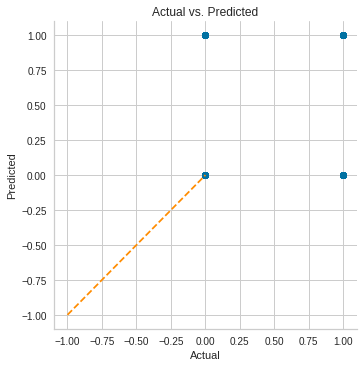

In [ ]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
    the response variable. If not, either a quadratic term or another
    algorithm should be used.
    """

    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')

    print('Checking with a scatter plot of actual vs. predicted.',
          'Predictions should follow the diagonal line.')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and Y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

linear_assumption(model, selected_features_df.drop(columns=['diabetes']), selected_features_df['diabetes'])

### NORMALITY OF THE ERROR TERMS

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


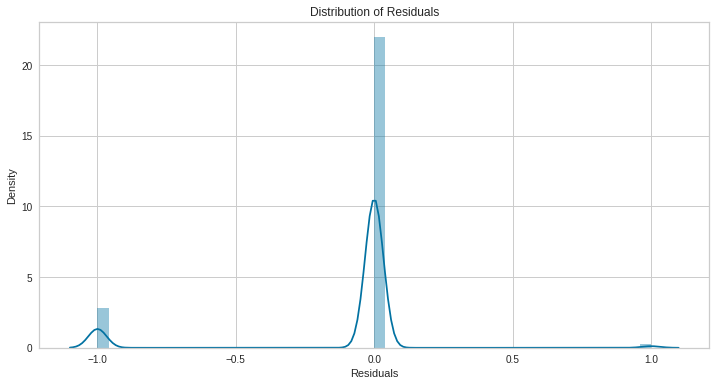


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.

    This assumption being violated primarily causes issues with the confidence intervals
    """

    from statsmodels.stats.diagnostic import normal_ad

    print('Assumption 2: The error terms are normally distributed', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)

    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)

    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')


    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

normal_errors_assumption(model, selected_features_df.drop(columns=['diabetes']), selected_features_df['diabetes'])

### No Multicollinearity Among Predictors


Assumption 3: Little to no multicollinearity among predictors


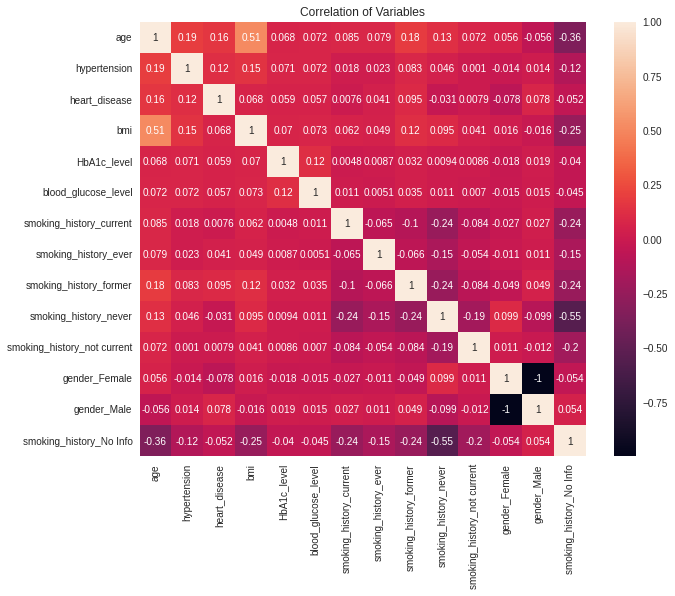

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
    correlation among the predictors, then either remove predictors with high
    Variance Inflation Factor (VIF) values or perform dimensionality reduction.

    This assumption being violated causes issues with interpretability of the
    coefficients and the standard errors of the coefficients.
    """

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()

    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')

    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]

    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))

    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])

    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')


multicollinearity_assumption(model, selected_features_df.drop(columns=['diabetes']), selected_features_df['diabetes'], feature_names=selected_features_df.drop(columns=['diabetes']).columns)


### No Autocorrelation of the Error Terms


In [ ]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
    autocorrelation, then there is a pattern that is not explained due to
    the current value being dependent on the previous value.
    This may be resolved by adding a lag variable of either the dependent
    variable or some of the predictors.
    """

    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')

    # Calculating residuals for the Durbin Watson test
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2 is positive autocorrelation')
    print('2 to 4 is negative autocorrelation')
    print('-------------------')

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)

    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

autocorrelation_assumption(model, selected_features_df.drop(columns=['diabetes']), selected_features_df['diabetes'])

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2 is positive autocorrelation
2 to 4 is negative autocorrelation
-------------------
Durbin-Watson: 1.823076923076923
Little to no autocorrelation 

Assumption satisfied


### Homoscedasticity

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relatively constant variance


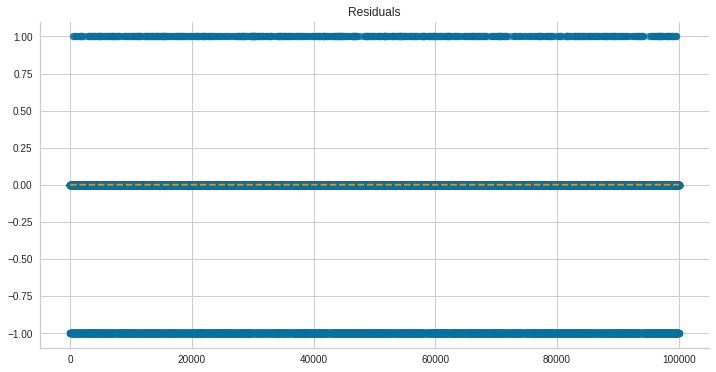

In [ ]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """

    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    print('Residuals should have relatively constant variance')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)    # Removing the top spine
    plt.title('Residuals')
    plt.show()

homoscedasticity_assumption(model, selected_features_df.drop(columns=['diabetes']), selected_features_df['diabetes'])

### PREDICT ON THE TEST SET

In [ ]:
# predict on test set (test set is put aside by the PyCaret lib when you setup your model)
holdout_pred = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8892,0.9612,0.8829,0.4268,0.5754,0.5205,0.5661


## MODEL EVALUATION

### Cross Validation

In [ ]:
from pycaret.classification import *
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming you have your setup and model

# Perform cross-validation
scores = cross_val_score(model, selected_features_df.drop(columns=['diabetes']), selected_features_df['diabetes'], cv=10, scoring='accuracy') # Adjust scoring as needed

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())# High std indicates high variance

Cross-validation scores: [0.88881955 0.88985959 0.88112324 0.88881955 0.88642746 0.88653146
 0.87892657 0.88599958 0.88724776 0.87903058]
Mean accuracy: 0.8852785356681586
Standard deviation: 0.0038730121092524134


### Learning Curve

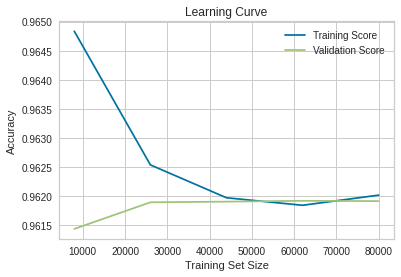

In [ ]:
from pycaret.classification import *  # Or 'regression' for regression tasks
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Assuming you have your setup and model ready
# ... (Your previous PyCaret code) ...

# Extract the model from PyCaret
# final_model = finalize_model(tuned_model)  # Or any other model

x_data = selected_features_df.drop(columns=['diabetes'])
y_data = selected_features_df['diabetes']

# Create learning curve
train_sizes, train_scores, test_scores = learning_curve(
    final_model,
    x_data,  # Your feature data
    y_data,  # Your target data
    cv=5,  # Number of cross-validation folds
    scoring='roc_auc',  # Or any other relevant scoring metric for classification, or a regression metric (e.g., 'neg_mean_squared_error') for regression.
)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')  # Or any other relevant scoring metric
plt.legend()
plt.show()

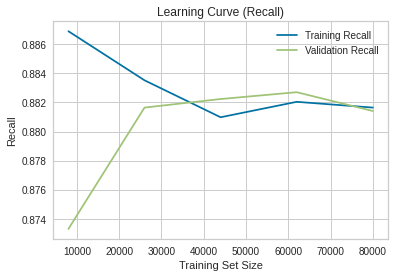

In [ ]:
from pycaret.classification import *  # Or 'regression' for regression tasks
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Assuming you have your setup and model ready
# ... (Your previous PyCaret code) ...

# Extract the model from PyCaret
# final_model = finalize_model(tuned_model)  # Or any other model

x_data = selected_features_df.drop(columns=['diabetes'])
y_data = selected_features_df['diabetes']

# Create learning curve for Recall
train_sizes, train_scores, test_scores = learning_curve(
    final_model,
    x_data,  # Your feature data
    y_data,  # Your target data
    cv=5,  # Number of cross-validation folds
    scoring='recall',  # Use 'recall' as the scoring metric
)

# Plot the learning curve for Recall
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Recall')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Recall')
plt.title('Learning Curve (Recall)')
plt.xlabel('Training Set Size')
plt.ylabel('Recall')
plt.legend()
plt.show()

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

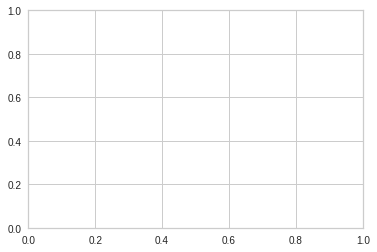

In [ ]:
# Evaluate model for overfitting/underfitting by evaluating performance on test data
evaluate_model(final_model)

In [ ]:
# You're essentially asking your trained model to apply what it has learned from the training data to the test data and give you its best guess (prediction) for the target variable (e.g., diabetes) for each row in test_df. These predictions are then stored in the predictions variable.
# Running model with Testing dataset
predictions = predict_model(final_model, data=test_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9606,0.9624,0.6350,0.8720,0.7349,0.7142,0.7246


In [ ]:
# OUTPUT WHAT COLUMNS END UP IN PREDICTIONS
# predictions.head(20)
predictions.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current', 'gender_Female', 'gender_Male',
       'gender_Other', 'diabetes', 'prediction_label', 'prediction_score'],
      dtype='object')

In [ ]:
predictions.head(100)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other,diabetes,prediction_label,prediction_score
55689,1.070944,0,0,3.334345,-0.679490,-0.197948,True,False,False,False,False,False,True,False,False,0,0,0.9985
57243,-0.350222,0,0,3.307619,0.628107,-0.296209,False,False,False,False,True,False,False,True,False,0,0,0.9854
51512,0.315949,0,0,3.051167,0.161108,-1.303384,True,False,False,False,False,False,True,False,False,0,0,0.9994
27280,0.493595,0,0,3.403195,0.534707,0.047704,True,False,False,False,False,False,False,True,False,0,0,0.9643
48327,-0.616691,0,0,3.233567,-0.959689,-0.197948,True,False,False,False,False,False,True,False,False,0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66378,1.337412,0,0,3.450622,1.001706,3.486837,True,False,False,False,False,False,False,True,False,1,1,0.9715
14937,-1.682565,0,0,2.999724,-0.679490,0.416183,True,False,False,False,False,False,True,False,False,0,0,0.9999
9832,-1.060805,0,0,3.307619,0.254508,-1.426210,True,False,False,False,False,False,False,True,False,0,0,0.9996
17078,1.381824,0,0,3.307619,-0.959689,0.047704,False,False,False,False,True,False,True,False,False,0,0,0.9978


In [ ]:
# GET PREDICTIONS INTO SEPARATE DataFrame
results_df = predictions[['diabetes', "prediction_label"]]
results_df.columns = ['Actual', 'Predicted'] # Rename columns

results_df.head(10000)

,Actual,Predicted
55689,0,0
57243,0,0
51512,0,0
27280,0,0
48327,0,0
...,...,...
45428,0,0
35475,0,0
2501,0,0
25705,0,0


### Confusion Matrix



```
            Predicted
            0        1
Actual 0    TN       FP
       1    FN       TP

```


TN: Number of people correctly predicted as not having diabetes.
True Negatives (TN): The cases where the model correctly predicted the negative class.

FP: Number of people incorrectly predicted as having diabetes when they don't.
False Positives (FP) (Type I Error): The cases where the model incorrectly predicted the positive class when it was actually negative.

FN: Number of people incorrectly predicted as not having diabetes when they do.
False Negatives (FN) (Type II Error): The cases where the model incorrectly predicted the negative class when it was actually positive.

TP: Number of people correctly predicted as having diabetes.
True Positives (TP): The cases where the model correctly predicted the positive class.
True Positives (TP): The cases where the model correctly predicted the positive class.

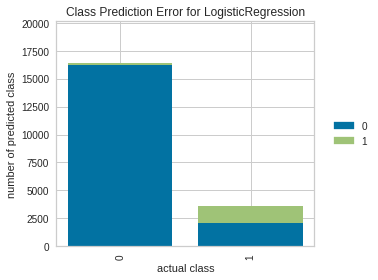

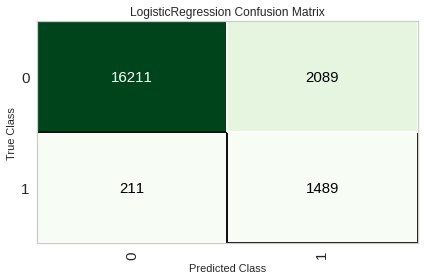

In [ ]:
# plot_model(final_model, plot='feature')
plot_model(final_model, plot='error')
plot_model(final_model, plot='confusion_matrix')

# plot_model(final_model, plot='class_report')
# plot_model(final_model, plot='boundary')

In [ ]:
# interpret model
# This function only supports tree based models for binary classification: dt, xgboost, rf, et, catboost, lightgbm.
# interpret_model(final_model)

## SAVE MODEL

### SAVE LOCALLY

In [ ]:
# save model
# /mnt/c/ is path for C:\ in WLS
save_model(final_model, model_name='/mnt/c/Projects/diabetes_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'hypertension',
                                              'heart_disease', 'bmi',
                                              'HbA1c_level',
                                              'blood_glucose_level'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Tran...
                  TransformerWrapper(ex

### SAVE TO GOOGLE DRIVE

In [ ]:
# SAVE TO GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')
save_model(final_model, model_name='/content/drive/MyDrive/ML/diabetes_model')

## CONVERT COLLAB

In [ ]:
!pip install nbconvert

# sometimes it might say its satisfied but not work then we can run this
!pip install --force-reinstall nbconvert

WSL you need to run to install libs

$ sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf "/mnt/c/Projects/DiabetesPrediction.ipynb"

[NbConvertApp] Converting notebook /mnt/c/Projects/DiabetesPrediction.ipynb to pdf
[NbConvertApp] Support files will be in DiabetesPrediction_files/
[NbConvertApp] Making directory ./DiabetesPrediction_files
[NbConvertApp] Writing 284355 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
